In [2]:
#Make sure to run spec1d_mag_vs_flux.ipynb first, this notebook heavily relies on data extracted by spec1d_mag_vs_flux.ipynb

#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os as os
from astropy.io import fits as fits
from astropy.coordinates import SkyCoord, EarthLocation
import math

In [3]:
data = np.genfromtxt('Data/airmass_coffset.txt',skip_header=1,dtype=['U16','<f8','<f8','<f8','<f8'], names=['mask','airmass','c_R','c_G','c_B'])

In [10]:
#function for plot configuration
def InitializePlot():
    plt.clf()
    plt.figure(figsize=(8,8))
    plt.xlim()
    plt.ylim()
    plt.xlabel('')
    plt.ylabel('')
    plt.rcParams['font.family']='serif'
    plt.rcParams['font.size']=14

In [54]:
def plot(x, y, title, color):
    plt.figure()
    InitializePlot()
    plt.title(title)
    plt.scatter(x, y, c = color, s = 5, edgecolors = color)
    m, b = np.polyfit(x, y, 1)
    print("line of best fit: y = " + str(m)+"x" +" + " + str(b))
    plt.plot(x, m*x + b, c = color)
    plt.gca().set_aspect('equal')

In [55]:
def triplot(x1, y1, x2, y2, x3, y3, title, c1, c2, c3):
    plt.figure()
    InitializePlot()
    plt.title(title)
    plt.scatter(x1, y1, c = c1, s = 8, edgecolors = c1)
    m, b = np.polyfit(x1, y1, 1)
    print("line of best fit R: y = " + str(m)+"x" +" + " + str(b))
    plt.plot(x1, m*x1 + b, c = c1)
    plt.scatter(x2, y2, c = c2, s = 8, edgecolors = c2)
    m, b = np.polyfit(x2, y2, 1)
    print("line of best fit G: y = " + str(m)+"x" +" + " + str(b))
    plt.plot(x2, m*x2 + b, c = c2)
    plt.scatter(x3, y3, c = c3, s = 8, edgecolors = c3)
    m, b = np.polyfit(x3, y3, 1)
    print("line of best fit B: y = " + str(m)+"x" +" + " + str(b))
    plt.plot(x3, m*x3 + b, c = c3)
    plt.gca().set_aspect('equal')


In [56]:
airmass = data['airmass']
r = data['c_R']
g = data['c_G']
b = data['c_B']

line of best fit: y = -0.20907509934876153x + 27.506583507700597


<Figure size 432x288 with 0 Axes>

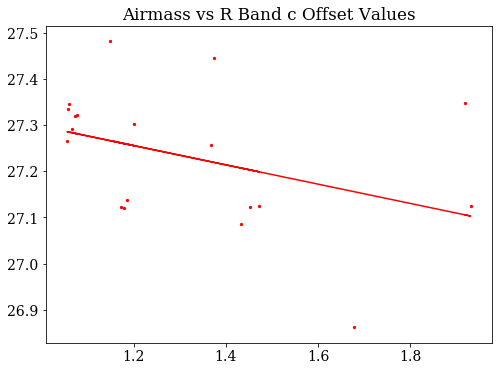

In [57]:
#R band plot
plot(airmass, r, "Airmass vs R Band c Offset Values", "red")

line of best fit: y = -0.12612336075134858x + 27.752369316328767


<Figure size 432x288 with 0 Axes>

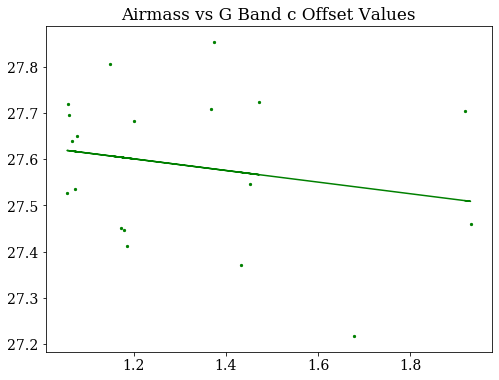

In [58]:
#G band plot
plot(airmass, g, "Airmass vs G Band c Offset Values", "green")

line of best fit: y = -0.3170029881093377x + 28.1845364542542


<Figure size 432x288 with 0 Axes>

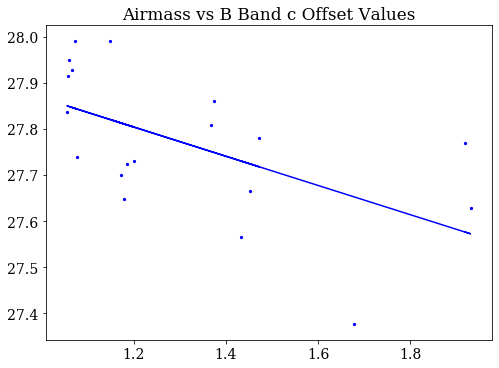

In [59]:
#B band plot
plot(airmass, b, "Airmass vs B Band c Offset Values", "blue")

line of best fit R: y = -0.20907509934876153x + 27.506583507700597
line of best fit G: y = -0.12612336075134858x + 27.752369316328767
line of best fit B: y = -0.3170029881093377x + 28.1845364542542


<Figure size 432x288 with 0 Axes>

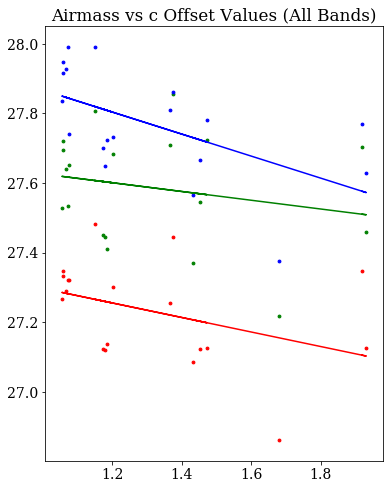

In [60]:
#All three bands plotted on same axes
triplot(airmass, r, airmass, g, airmass, b, "Airmass vs c Offset Values (All Bands)", "red", "green", "blue")